In [0]:
!rm -rf CarND-Semantic-Segmentation-Project
!git clone https://github.com/italojs/CarND-Semantic-Segmentation-Project.git
%cd CarND-Semantic-Segmentation-Project/

Cloning into 'CarND-Semantic-Segmentation-Project'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 84 (delta 49), reused 61 (delta 26), pack-reused 0
Unpacking objects: 100% (84/84), done.
/content/CarND-Semantic-Segmentation-Project


# Download dataset

In [0]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_road.zip
!unzip -q data_road.zip -d data

--2019-02-21 19:38:11--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_road.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.72.72
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.72.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470992343 (449M) [application/zip]
Saving to: ‘data_road.zip’

data_road.zip       100%[===================>] 449.17M  41.7MB/s    in 12s     

2019-02-21 19:38:23 (37.3 MB/s) - ‘data_road.zip’ saved [470992343/470992343]



#Executing the main.py

In [0]:
!python main.py -e 25 -i './data/data_road/training/image_2/*.png' -l './data/data_road/training/gt_image_2/*_road_*.png' -n 2 

TensorFlow Version: 1.13.0-rc2
2019-02-21 19:38:33.645813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-21 19:38:33.646207: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x190f340 executing computations on platform Host. Devices:
2019-02-21 19:38:33.646244: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-21 19:38:33.816331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-21 19:38:33.816888: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x190ec60 executing computations on platform CUDA. Devices:
2019-02-21 19:38:33.816926: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-02-21 19:38:33.817382: I tensorflow/core/common_runtime/

In [0]:
!ls ./runs/1550780077

um_000000.png  um_000058.png   umm_000020.png  umm_000078.png  uu_000042.png
um_000001.png  um_000059.png   umm_000021.png  umm_000079.png  uu_000043.png
um_000002.png  um_000060.png   umm_000022.png  umm_000080.png  uu_000044.png
um_000003.png  um_000061.png   umm_000023.png  umm_000081.png  uu_000045.png
um_000004.png  um_000062.png   umm_000024.png  umm_000082.png  uu_000046.png
um_000005.png  um_000063.png   umm_000025.png  umm_000083.png  uu_000047.png
um_000006.png  um_000064.png   umm_000026.png  umm_000084.png  uu_000048.png
um_000007.png  um_000065.png   umm_000027.png  umm_000085.png  uu_000049.png
um_000008.png  um_000066.png   umm_000028.png  umm_000086.png  uu_000050.png
um_000009.png  um_000067.png   umm_000029.png  umm_000087.png  uu_000051.png
um_000010.png  um_000068.png   umm_000030.png  umm_000088.png  uu_000052.png
um_000011.png  um_000069.png   umm_000031.png  umm_000089.png  uu_000053.png
um_000012.png  um_000070.png   umm_000032.png  umm_000090.png  uu_000054.png

#Visualizing the results

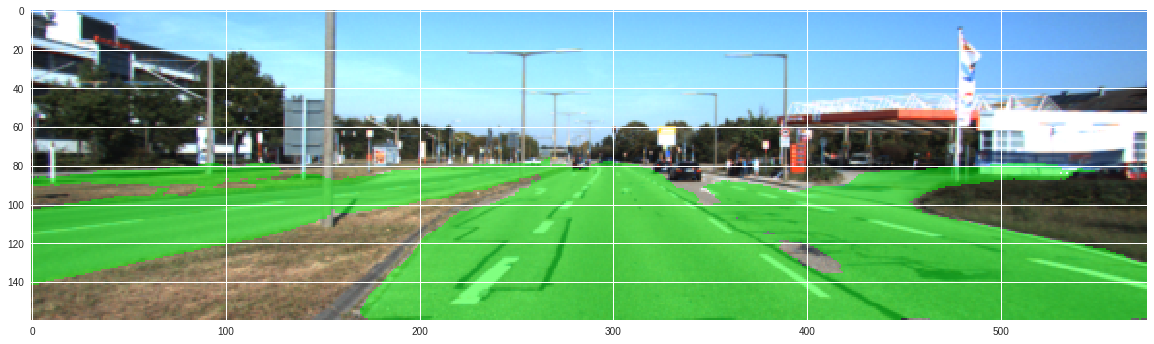

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image_folder = '1550780077'

image = mpimg.imread('./runs/{}/umm_000019.png'.format(image_folder))
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(image)
plt.show()

#Uploading the tested images to google drive

In [0]:
!zip -r images_FCN.zip ./runs/
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

model_file = drive.CreateFile({'title' : 'images_FCN.zip'})
model_file.SetContentFile('images_FCN.zip')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

  adding: runs/ (stored 0%)
  adding: runs/1550780077/ (stored 0%)
  adding: runs/1550780077/um_000063.png (deflated 0%)
  adding: runs/1550780077/uu_000031.png (deflated 0%)
  adding: runs/1550780077/uu_000042.png (deflated 0%)
  adding: runs/1550780077/um_000028.png (deflated 0%)
  adding: runs/1550780077/um_000000.png (deflated 0%)
  adding: runs/1550780077/umm_000065.png (deflated 0%)
  adding: runs/1550780077/uu_000015.png (deflated 0%)
  adding: runs/1550780077/um_000090.png (deflated 0%)
  adding: runs/1550780077/uu_000034.png (deflated 0%)
  adding: runs/1550780077/uu_000066.png (deflated 0%)
  adding: runs/1550780077/um_000007.png (deflated 0%)
  adding: runs/1550780077/um_000023.png (deflated 0%)
  adding: runs/1550780077/uu_000055.png (deflated 0%)
  adding: runs/1550780077/umm_000009.png (deflated 0%)
  adding: runs/1550780077/um_000014.png (deflated 0%)
  adding: runs/1550780077/uu_000051.png (deflated 0%)
  adding: runs/1550780077/um_000011.png (deflated 0%)
  adding: run

GoogleDriveFile({'id': '1Cxmo0mWm3zp-Cf6mC4yp51bojesQbDey'})